<h1 align = "center" >HRV analysis</h1>

## Introduction
The aim of this notebook is to perform the HRV analysis on the data from the BrainLab database. The data is stored as a CSV file. First the data will be loaded and then the HRV analysis will be performed. The HRV analysis will be performed using the  `neurokit2` library. The `neurokit2` library is a Python library for biosignal processing. The data will be loaded using the `pandas` library. The HRV analysis will be performed using the `pyhrv` and `neurokit2` libraries. The data will be plotted using the `matplotlib` library.

## Importing the libraries

In [2]:
from path_handler import PathHandler
import neurokit2 as nk 
from pyhrv import frequency_domain as fd 
from pyhrv import time_domain as td
import matplotlib.pyplot as plt 

## Loading the data - ABP signal

In [34]:
path_to_folder = r"C:\Users\Damian\Desktop\dane"
names = ['abp_finger_mm_hg_[abp_finger_mm_Hg_]']
data = PathHandler(path_to_folder, names)

## HRV analysis using ABP signal

e[3]_[n]_[01].csv
   HRV_MeanNN  HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  542.763158  27.58918    7.162588   24.676605         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  14.600842  14.613642  ...     0.87492    4.400355   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD  \
0     0.895755  1.541292   1.394417    1.611793  1.761555  1.670731  2.258127   

   HRV_LZC  
0  0.70645  

[1 rows x 91 columns]
e[3]_[n]_[03].csv
   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  821.084337  61.478747   25.559522   58.419765         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  45.120684  45.188995  ...    1.733905    5.481582   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn   HRV_CD   HRV_HFD   HRV_KFD  \
0     1.222878  1.505714   1.409264    2.10315

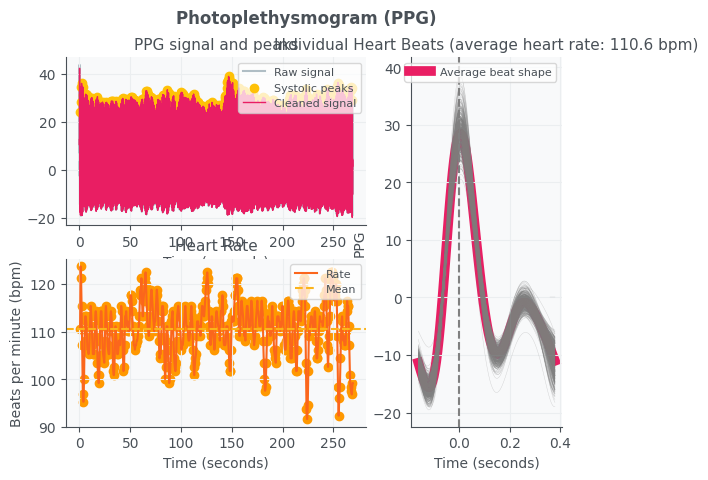

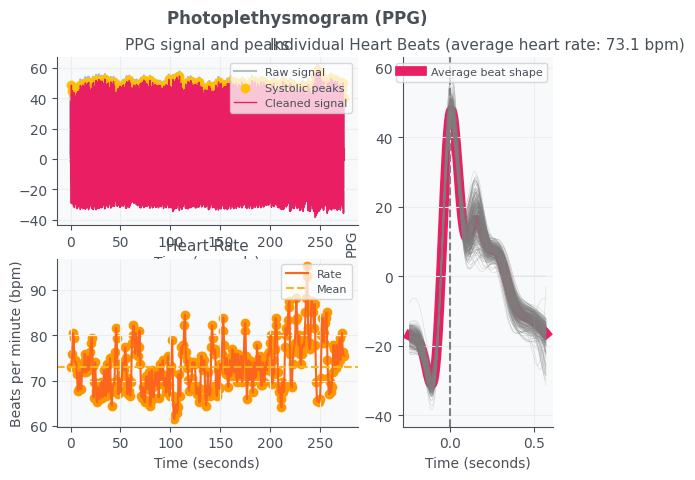

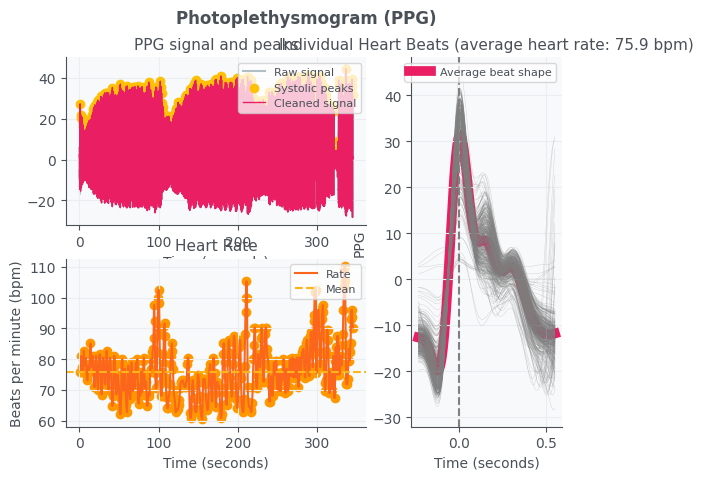

In [35]:
for signal, name in zip(data.signals, data.all_alaized_files_names):
    """
    Cell to process and plot the signal
    1. Clean the signal
    2. Process the signal
    3. Plot the signal
    4. Find the peaks
    5. Calculate the HRV
    """
    ppg = signal
    cleaned_signal = nk.ppg_clean(ppg, sampling_rate=200)
    processed_signal, info = nk.ppg_process(cleaned_signal, sampling_rate=200)
    nk.ppg_plot(processed_signal, info) 
    r_peaks = nk.ppg_peaks(cleaned_signal)
    print(name)
    time = nk.hrv(processed_signal['PPG_Peaks'], sampling_rate=200)
    print(time)

## Loading the data - ECG signal

In [5]:
names = ['ekg__[ekg__]']
data = PathHandler(path_to_folder, names)

## HRV analysis using ECG signal

e[3]_[n]_[01].csv
   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  542.858586  25.156599    7.041315   22.047935         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  12.701812  12.713073  ...    0.789848    4.236444   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn   HRV_CD   HRV_HFD   HRV_KFD  \
0     0.854238  1.549916    1.38539    1.516709  1.65881  1.613683  2.241257   

    HRV_LZC  
0  0.614836  

[1 rows x 91 columns]
e[3]_[n]_[03].csv
   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  821.114458  60.504866   25.499219   57.353063         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  44.127151  44.193957  ...    1.746961    5.472368   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD  \
0     1.220898  1.546323   1.358769    2.10

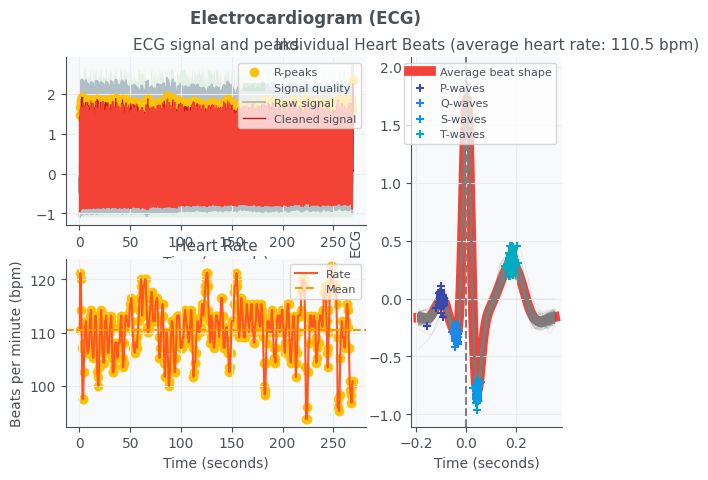

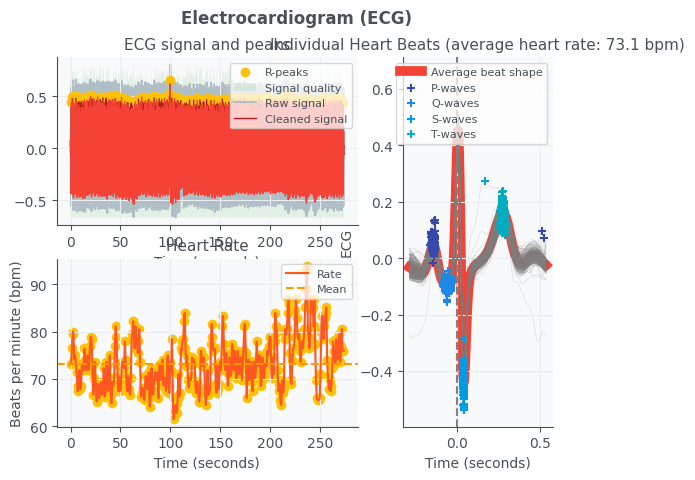

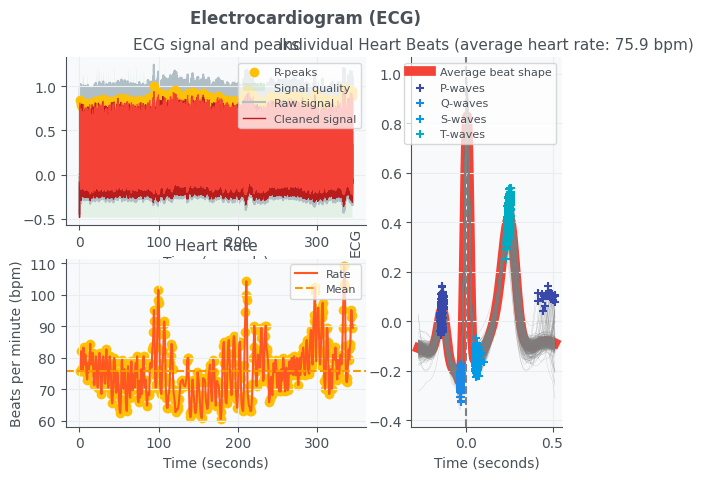

In [26]:
for signal, name in zip(data.signals, data.all_alaized_files_names):
    """
    Cell to process and plot the signal
    1. Clean the signal
    2. Process the signal
    3. Plot the signal
    5. Calculate the HRV
    """
    
    ekg = signal
    cleaned_signal = nk.ecg_clean(ekg, sampling_rate=200)
    processed_signal, info = nk.ecg_process(cleaned_signal, sampling_rate=200)
    nk.ecg_plot(processed_signal, info) 
    
    r_peaks = nk.ecg_peaks(cleaned_signal)
    print(name)
    hrv =nk.hrv(processed_signal['ECG_R_Peaks'], sampling_rate=200)
    print(hrv)